------
# CAR PRICE PREDICTION USING MACHINE LEARING
--------

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

--------
# 📂 Dataset Overview
----------
<div style="font-family: Arial; font-size: 16px; line-height: 1.6;">

<p>The dataset used in this project is <strong>CarPrice_Assignment.csv</strong>. It contains detailed information on various car models and their pricing. This dataset is commonly used for regression tasks in machine learning.</p>

<p><strong>Total Rows:</strong> 205<br>
<strong>Total Columns:</strong> 26</p>
------------------------------------------------------------------------------------------------------------------------------------------------------
<h3>🔑 Key Columns Explained:</h3>
------------------------------------------------------------------------------------------------------------------------------------------------------
<ul>
  <li><strong>car_ID:</strong> Unique ID for each car (removed during preprocessing).</li>
  <li><strong>CarName:</strong> Name of the car (used to extract brand).</li>
  <li><strong>fueltype:</strong> Type of fuel (e.g., gas, diesel).</li>
  <li><strong>aspiration:</strong> Standard or turbocharged engine.</li>
  <li><strong>doornumber:</strong> Number of doors (two or four).</li>
  <li><strong>carbody:</strong> Body style (sedan, hatchback, wagon, etc.).</li>
  <li><strong>drivewheel:</strong> Type of drive system (FWD, RWD, 4WD).</li>
  <li><strong>enginelocation:</strong> Location of the engine (front or rear).</li>
  <li><strong>wheelbase:</strong> Distance between front and rear wheels (inches).</li>
  <li><strong>carlength / carwidth / carheight:</strong> Car dimensions (inches).</li>
  <li><strong>curbweight:</strong> Weight of the car without passengers (pounds).</li>
  <li><strong>enginetype / cylindernumber / fuelsystem:</strong> Technical engine specs.</li>
  <li><strong>enginesize:</strong> Size of the engine (cc).</li>
  <li><strong>boreratio / stroke / compressionratio:</strong> Internal engine metrics.</li>
  <li><strong>horsepower:</strong> Engine power (HP).</li>
  <li><strong>peakrpm:</strong> Max RPM before redlining.</li>
  <li><strong>citympg / highwaympg:</strong> Fuel efficiency (miles per gallon).</li>
  <li><strong>price:</strong> <strong>Target variable</strong> — market price of the car (USD).</li>
</ul>

<p>The dataset includes both <em>categorical</em> and <em>numerical</em> features, making it ideal for supervised regression modeling after proper preprocessing.</p>

</div>


In [53]:
df = pd.read_csv(r"C:\Users\saran\Downloads\CarPrice_Assignment.csv")
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())
df['CarBrand'] = df['CarBrand'].replace({
    'vw': 'volkswagen', 'vokswagen': 'volkswagen',
    'toyouta': 'toyota', 'porcshce': 'porsche',
    'maxda': 'mazda'
})
df.drop(columns=['car_ID', 'CarName'], inplace=True)

----------
## COUNT PLOTS
----------
#### CAR BRANDS

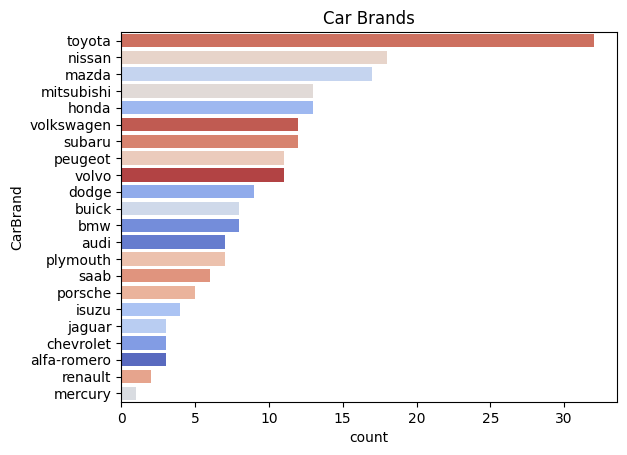

In [54]:
sns.countplot(y='CarBrand', data=df, order=df['CarBrand'].value_counts().index, hue='CarBrand', dodge=False, palette='coolwarm', legend=False)
plt.title("Car Brands")
plt.show()

------
## COUNT PLOTS
------
#### FULE TYPE

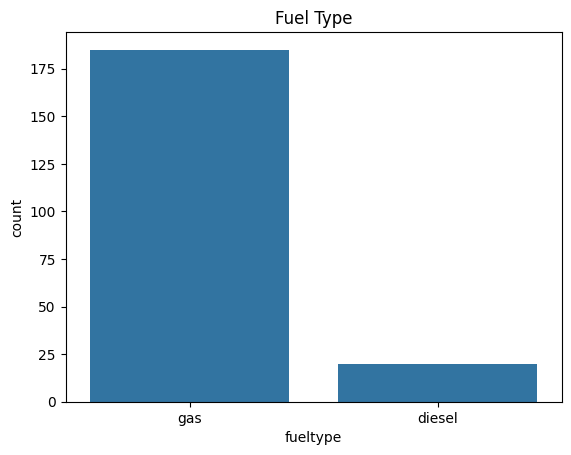

In [55]:
sns.countplot(x='fueltype', data=df)
plt.title("Fuel Type")
plt.show()

------------
## HISTPLOT
----------------
#### PRICE DISTRIBUTION

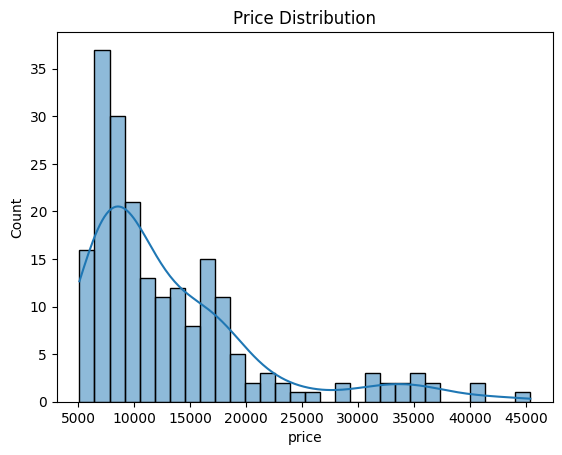

In [56]:
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.show()

-----------
## BOXPLOT
-----------
#### price vs Car Body

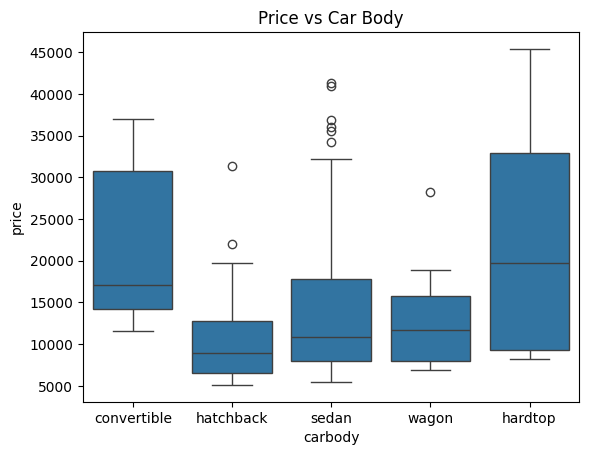

In [57]:
sns.boxplot(x='carbody', y='price', data=df)
plt.title("Price vs Car Body")
plt.show()

------------
## boxplot
-----------
#### Price vs Drive Wheel

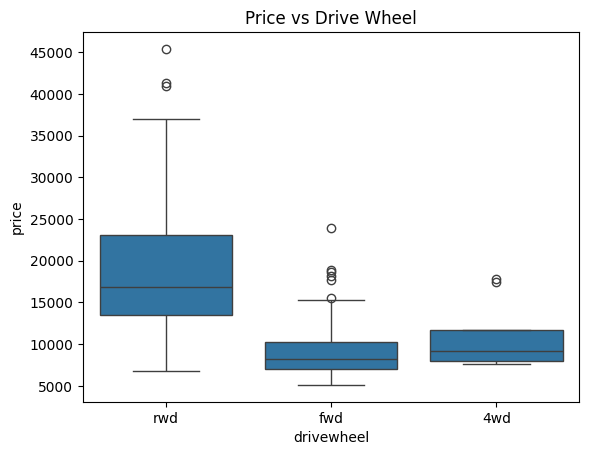

In [58]:
sns.boxplot(x='drivewheel', y='price', data=df)
plt.title("Price vs Drive Wheel")
plt.show()

--------
## heat map
----------
#### Correlation Heatmap

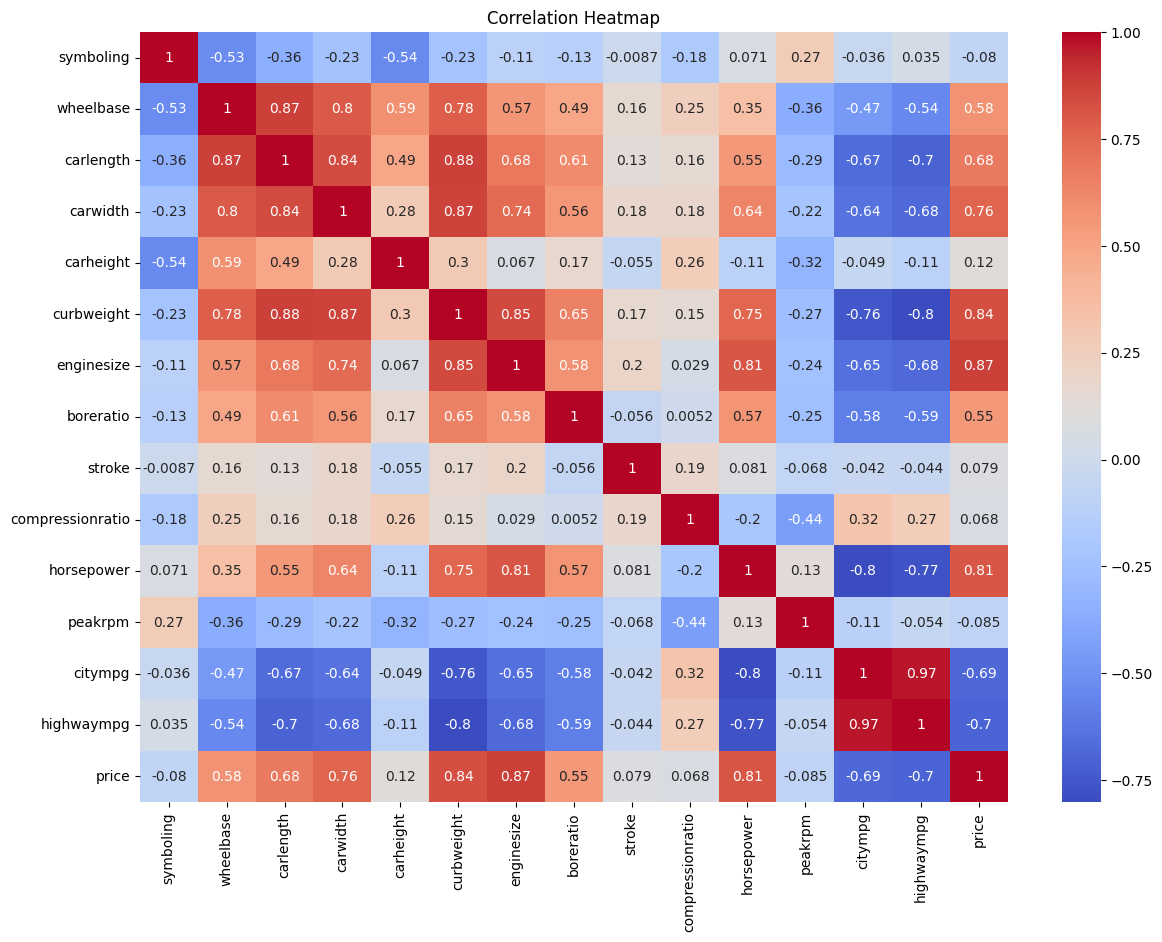

In [59]:
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

---------------
## Pairplot
----------------

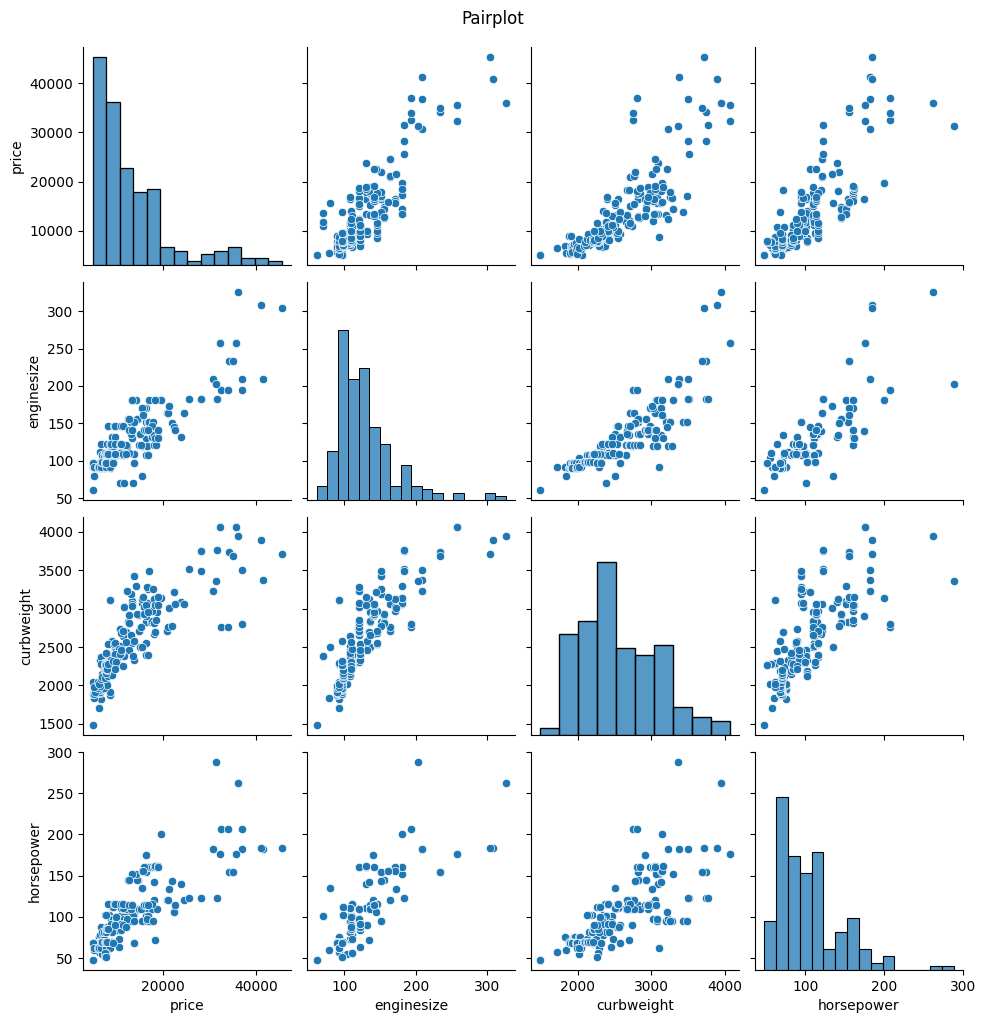

In [60]:
sns.pairplot(df[['price', 'enginesize', 'curbweight', 'horsepower']])
plt.suptitle("Pairplot", y=1.02)
plt.show()

-------------------------

## SCATTERPLOT
------------------
#### City MPG vs Price

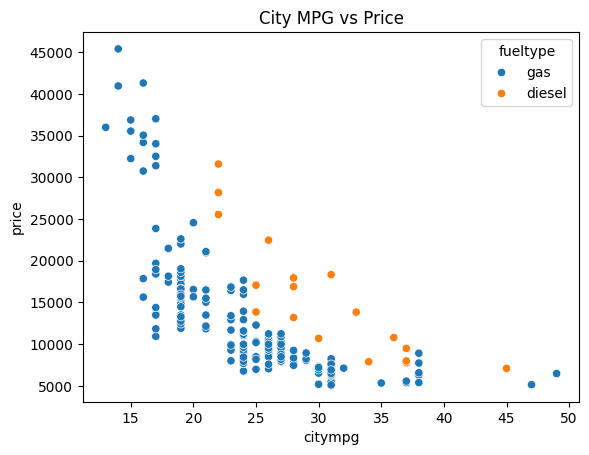

In [61]:
sns.scatterplot(x='citympg', y='price', hue='fueltype', data=df)
plt.title("City MPG vs Price")
plt.show()

-------------------------
## SCATTERPLOT
-----------------------
#### Horsepower vs Price

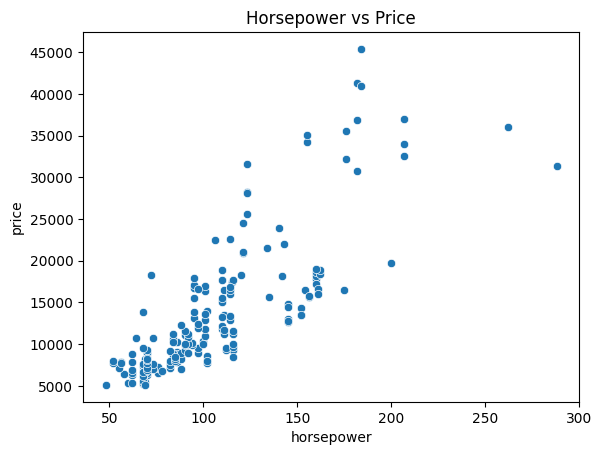

In [62]:
sns.scatterplot(x='horsepower', y='price', data=df)
plt.title("Horsepower vs Price")
plt.show()

------------------
## SCATTERPLOT
------------------
#### CAR WIDTH VS PRICE

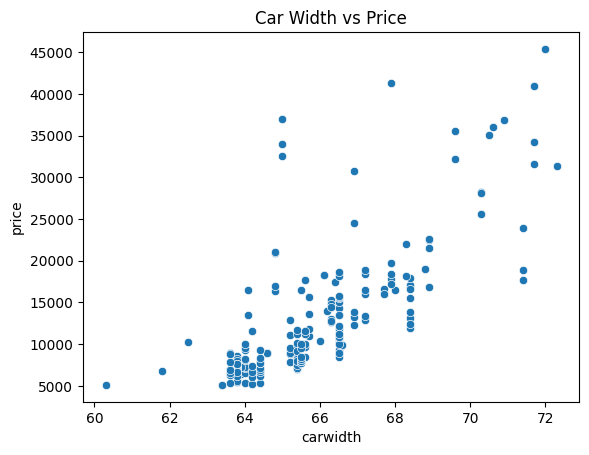

In [63]:
sns.scatterplot(x='carwidth', y='price', data=df)
plt.title("Car Width vs Price")
plt.show()

In [64]:
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)

R² Score: 0.9555591507127053
RMSE: 1873.0561481295515
